In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Load datasets
file_path = './HousingDataMerged.csv'
housing_data = pd.read_csv(file_path)

file_path = './CrimeDataSummed.csv'
crime_data = pd.read_csv(file_path)

In [4]:
housing_data['Date'] = pd.to_datetime(housing_data['Date'], format='mixed')

housing_data['Date'] = housing_data['Date'].dt.strftime('%Y')

housing_data.rename(columns={'Date': 'Year'}, inplace=True)

housing_data['Year'] = housing_data['Year'].astype(str)

housing_data = housing_data.replace(' City Council', '', regex=True)

housing_data.rename(columns={'CouncilArea': 'Council'}, inplace=True)

print(housing_data.head())

         Suburb            Address  Rooms Type    Price Method   SellerG  \
0     Gowanbrae     1 Gowanbrae Dr      3    h   631000      S    Nelson   
1  Malvern East      1/13 Goode St      3    h  1210000      S  Marshall   
2    Hughesdale    1/13 Swindon Rd      2    u   516000      S       Ray   
3     Reservoir  1/147 Purinuan Rd      2    u   415000     PI       Ray   
4     Reservoir  1/21 Dumbarton St      3    u   475000      S       Ray   

   Year  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  2016      13.6      3043  ...         2    2       608         138.0   
1  2016      11.2      3145  ...         2    1       337         146.0   
2  2016      13.0      3166  ...         1    1         0          76.0   
3  2016      11.2      3073  ...         1    1       189          84.0   
4  2016      11.2      3073  ...         1    1       191         107.0   

   YearBuilt  Council Lattitude  Longtitude             Regionname  \
0       2001  Banyule 

In [5]:
print(crime_data.head())

  Council  Year  Sum
0  Alpine  2016  184
1  Alpine  2017  149
2  Alpine  2018  195
3  Alpine  2019  214
4  Alpine  2020  246


In [6]:
crime_data['Year'] = crime_data['Year'].astype(str)
years_to_keep = ['2016', '2017', '2018']
for i in years_to_keep:
    crime_data_df = crime_data[crime_data.Year.isin(years_to_keep) == True]
    
print(crime_data_df.head())


   Council  Year  Sum
0   Alpine  2016  184
1   Alpine  2017  149
2   Alpine  2018  195
9   Ararat  2016  460
10  Ararat  2017  519


In [7]:
# Group by 'Council' and plot each group
councils = crime_data_df['Council'].unique()

print(councils)\

plot_graphs = False

# Create a plot for each council
if plot_graphs:
    for council in councils:
        council_data = crime_data_df[crime_data_df['Council'] == council]
        
        plt.plot(council_data['Year'], council_data['Sum'], marker='o', label=council)

        # Adding labels and title for the plot
        plt.title(f'Crime Data for {council}')
        plt.xlabel('Year')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.ylabel('Sum')
        plt.grid(True)

        # Show the plot
        plt.show()

['Alpine' 'Ararat' 'Ballarat' 'Banyule' 'Bass Coast' 'Baw Baw' 'Bayside'
 'Benalla' 'Boroondara' 'Brimbank' 'Buloke' 'Campaspe' 'Cardinia' 'Casey'
 'Central Goldfields' 'Colac-Otway' 'Corangamite' 'Darebin'
 'East Gippsland' 'Frankston' 'Gannawarra' 'Glen Eira' 'Glenelg'
 'Golden Plains' 'Greater Bendigo' 'Greater Dandenong' 'Greater Geelong'
 'Greater Shepparton' 'Hepburn' 'Hindmarsh' 'Hobsons Bay' 'Horsham' 'Hume'
 'Indigo' 'Kingston' 'Knox' 'Latrobe' 'Loddon' 'Macedon Ranges'
 'Manningham' 'Mansfield' 'Maribyrnong' 'Maroondah' 'Melbourne' 'Melton'
 'Merri-bek' 'Mildura' 'Mitchell' 'Moira' 'Monash' 'Moonee Valley'
 'Moorabool' 'Mornington Peninsula' 'Mount Alexander' 'Moyne'
 'Murrindindi' 'Nillumbik' 'Northern Grampians' 'Port Phillip' 'Pyrenees'
 'Queenscliffe' 'South Gippsland' 'Southern Grampians' 'Stonnington'
 'Strathbogie' 'Surf Coast' 'Swan Hill' 'Towong' 'Wangaratta'
 'Warrnambool' 'Wellington' 'West Wimmera' 'Whitehorse' 'Whittlesea'
 'Wodonga' 'Wyndham' 'Yarra' 'Yarra Rang

In [8]:
crime_data['Year'] = crime_data['Year'].astype(str)

merged_data = pd.merge(housing_data, crime_data, on=['Council', 'Year'], how='inner')

merged_data = merged_data.join(pd.get_dummies(housing_data.Type)).drop(['Type'], axis=1)

print(merged_data.head())

         Suburb            Address  Rooms    Price Method   SellerG  Year  \
0     Gowanbrae     1 Gowanbrae Dr      3   631000      S    Nelson  2016   
1  Malvern East      1/13 Goode St      3  1210000      S  Marshall  2016   
2    Hughesdale    1/13 Swindon Rd      2   516000      S       Ray  2016   
3     Reservoir  1/147 Purinuan Rd      2   415000     PI       Ray  2016   
4     Reservoir  1/21 Dumbarton St      3   475000      S       Ray  2016   

   Distance  Postcode  Bedroom2  ...  YearBuilt  Council  Lattitude  \
0      13.6      3043         3  ...       2001  Banyule   -37.7090   
1      11.2      3145         3  ...       1993  Banyule   -37.8833   
2      13.0      3166         2  ...       1970  Banyule   -37.8967   
3      11.2      3073         2  ...       2012  Banyule   -37.7080   
4      11.2      3073         3  ...       1990  Banyule   -37.7019   

   Longtitude             Regionname Propertycount   Sum      h      t      u  
0    144.8925   Western Metrop

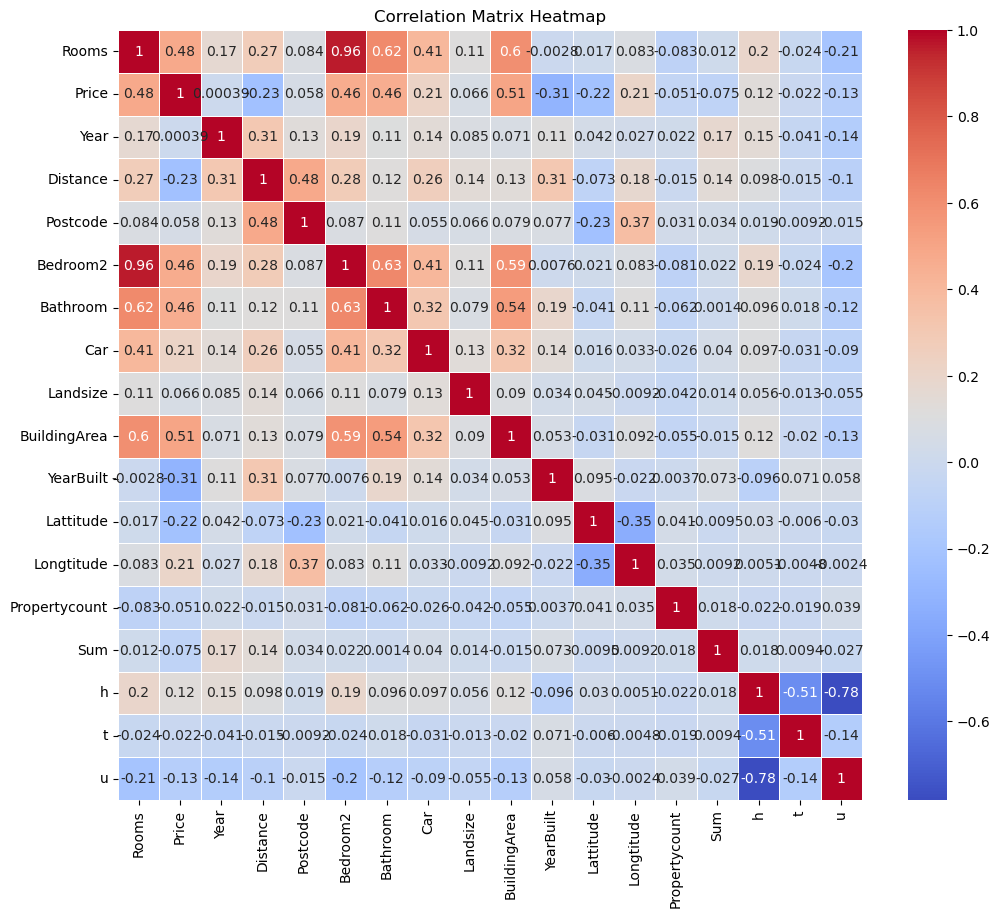

In [9]:
plt.figure(figsize=(12, 10))
merged_data = merged_data.drop(['Suburb', 'Address', 'SellerG', 'Method', 'Council', 'Regionname'],  axis=1)
corr_matrix = merged_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()